In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


d0 = pd.read_csv('./train.csv')

print(d0.shape)

print(d0.head(5))


l = d0['label']


d = d0.drop('label',axis = 1)

print(l.shape)
print(d.shape)

(42000, 785)
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0      

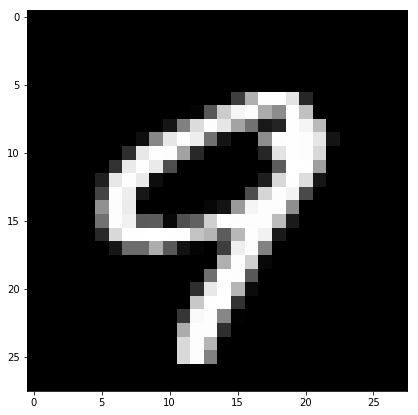

9


In [2]:
# display or plot a number

plt.figure(figsize=(7,7))
idx = 100

grid_data = d.iloc[idx].as_matrix().reshape(28,28)
plt.imshow(grid_data,interpolation = "none",cmap="gray")
plt.show()

print(l[idx])

In [3]:
label = l.head(15000)
data = d.head(15000)
print(data.shape)

(15000, 784)


In [4]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

from sklearn.manifold import TSNE

data_1000 = standardized_data[0:1000,:]
print(type(data_1000))







(15000, 784)
<class 'numpy.ndarray'>


In [5]:
# find the co-variance matrix which is : A^T * A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T,sample_data)

print("The shape of avariance matrix = ",covar_matrix.shape)

The shape of avariance matrix =  (784, 784)


In [6]:
# find the top two eigen-values and corresponding eigen-vectors
# for projecting onto 2-Dim space

from scipy.linalg import eigh





In [7]:
from sklearn.manifold import TSNE

data_1000 = standardized_data[0:1000,:]
labels_1000 = label[0:1000]

model = TSNE(n_components = 2,random_state=0)

tsne_data = model.fit_transform(data_1000)
print(tsne_data.shape)

(1000, 2)


In [8]:
print(data_1000.shape)

(1000, 784)


In [9]:
tsne_data = np.vstack((tsne_data.T,labels_1000)).T
print(tsne_data.shape)

tsne_df = pd.DataFrame(data=tsne_data,columns=("Dim_1","Dim_2","label"))

(1000, 3)


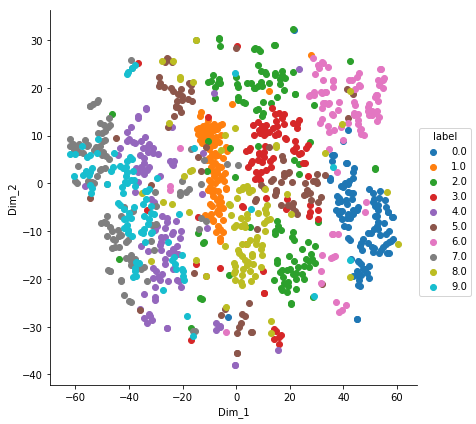

In [13]:
import seaborn as sn
sn.FacetGrid(tsne_df,hue="label",size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()
plt.show()